## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
students_url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

df_students = pd.read_csv(students_url)
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [94]:
df_students.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [95]:
df_students.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [96]:
rows, columns = df_students.shape
f'Linhas: {rows}, Colunas: {columns}'

'Linhas: 18, Colunas: 4'

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [97]:
df_students.dtypes

Nome         object
Idade         int64
Notas       float64
Aprovado       bool
dtype: object

In [98]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [99]:
df_students.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [100]:
df_students.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [101]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [102]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                      
# removendo imóveis comerciais
df_apartamento = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df_apartamento = df_apartamento.query('Tipo == "Apartamento"')

# visualizando a base de dados
df_apartamento.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [103]:
df_apartamento.Quartos.mean()

np.float64(2.481568707761622)

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [104]:
len(df_apartamento.Bairro.unique())

149

In [105]:
df_apartamento.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [106]:
df_apartamento.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).reset_index()

,Bairro,Valor
0,Joá,15500.000000
1,Arpoador,12429.769231
2,Cidade Jardim,12000.000000
3,Ipanema,9487.205317
4,Botafogo,9369.207116
...,...,...
144,Inhoaíba,650.000000
145,Cosmos,610.000000
146,Santa Cruz,590.000000
147,Paciência,510.000000


In [107]:
#5 maiores alugues por bairro
df_apartamento.nlargest(5, 'Valor')[['Bairro', 'Valor']]

,Bairro,Valor
23491,Botafogo,4500000.0
21024,Recreio dos Bandeirantes,1250000.0
11712,Barra da Tijuca,600000.0
19256,Freguesia (Jacarepaguá),550000.0
32357,Barra da Tijuca,160000.0


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

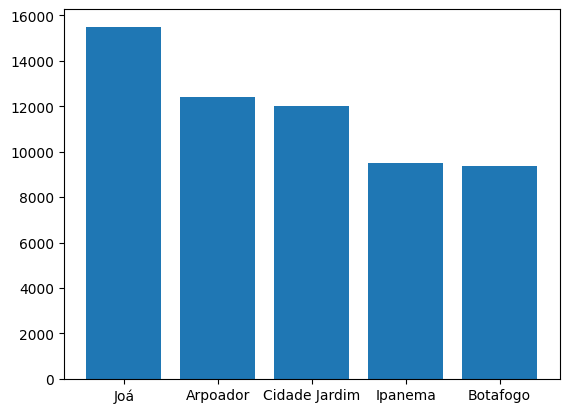

In [108]:
five_biggest_rent = df_apartamento.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).reset_index().head()
five_biggest_rent

plt.bar(five_biggest_rent['Bairro'], five_biggest_rent['Valor'])
plt.show()

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [109]:
df_students


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [110]:
df_students.isna().sum() # 6 valores nulos na coluna notas
print(df_students.Notas.dtype) # Verificando o tipo da coluna
df_students[df_students.isna().any(axis=1)] #Exibindo os valores NaN

float64


,Nome,Idade,Notas,Aprovado
1,Ana,18,NaN,False
5,Bruna,23,NaN,False
9,Vitor,28,NaN,False
10,Daniel,21,NaN,False
14,Paulo,37,NaN,False
16,Lucas,33,NaN,False


In [111]:
# Como todo aluno com nota NaN esta reprovado, substitui NaN por 0
df_students.fillna(0, inplace=True)

In [112]:
df_students

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [113]:
filter = df_students.query('Nome == "Alice" or Nome == "Carlos"').index # Seleciona os candidatos e recupera os indices.
print(filter)

Index([7, 8], dtype='int64')


In [114]:
df_students = df_students.drop(filter) # exclui as linhas apartir do indices selecionados
df_students

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [115]:
df_students[df_students["Aprovado"] == True]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [116]:
df_students.query('Aprovado == True')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [117]:
approved_students = df_students.query('Aprovado == True')

df_students.to_csv('alunos_aprovados.csv')

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [147]:
# Nomes das estudantes com nota 7
students_to_change_grade = df_students.query('Notas == 7')['Nome'].tolist()
students_to_change_grade

['Dara', 'Mylena']

In [ ]:
# alterando as notas
df_students.loc[df_students['Notas']== 7, 'Notas'] = 8

In [ ]:
# Verificando Mudanca
df_students[df_students['Nome'].isin(students_to_change_grade)]

,Nome,Idade,Notas,Aprovado
6,Dara,21,8.0,True
15,Mylena,29,8.0,True


In [156]:
df[df['Nome'].isin(students_to_change_grade)]

,Nome,Idade,Notas,Aprovado
6,Dara,21,7.0,True
15,Mylena,29,7.0,True


In [157]:
# Com replace
df['Notas'] = df['Notas'].replace({7: 8})

In [158]:
df[df['Nome'].isin(students_to_change_grade)]

,Nome,Idade,Notas,Aprovado
6,Dara,21,8.0,True
15,Mylena,29,8.0,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [159]:
df_students['Pontos_extras'] = df_students['Notas'] * 0.4

In [160]:
df_students

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
5,Bruna,23,0.0,False,0.0
6,Dara,21,8.0,True,3.2
9,Vitor,28,0.0,False,0.0
10,Daniel,21,0.0,False,0.0
11,Igor,24,4.5,False,1.8


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [161]:
df_students['Notas_finais'] = df_students['Notas'] + df_students['Pontos_extras']

In [162]:
df_students

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,8.0,True,3.2,11.2
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [ ]:
# Usando numpy where para criar uma nova coluna atraves de um filtro
import numpy as np

df_students['Aprovado_final'] = np.where(df_students['Notas_finais'] >= 6, True, False)

In [168]:
df_students

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,8.0,True,3.2,11.2,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [174]:
df_students.query('Aprovado == False')[df_students['Aprovado_final']== True]

/tmp/ipykernel_7760/885293197.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_students.query('Aprovado == False')[df_students['Aprovado_final']== True]


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True


In [175]:
df_students[(df_students['Aprovado'] == False) & (df_students['Aprovado_final'] == True)]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True
